In [1]:
import jax.numpy as jnp
from jax import grad, jit, vmap
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

In [9]:
np.random.seed(22)
x=np.linspace(-2,2,100)
y=5*x+2*np.random.normal(0,1,len(x))
data=pd.DataFrame({"Measurements":x,"Observations":y})
data

,Measurements,Observations
0,-2.000000,-10.183900
1,-1.959596,-12.724681
2,-1.919192,-7.432376
3,-1.878788,-9.872590
4,-1.838384,-10.174177
...,...,...
95,1.838384,10.930610
96,1.878788,8.960411
97,1.919192,9.630197
98,1.959596,11.177407


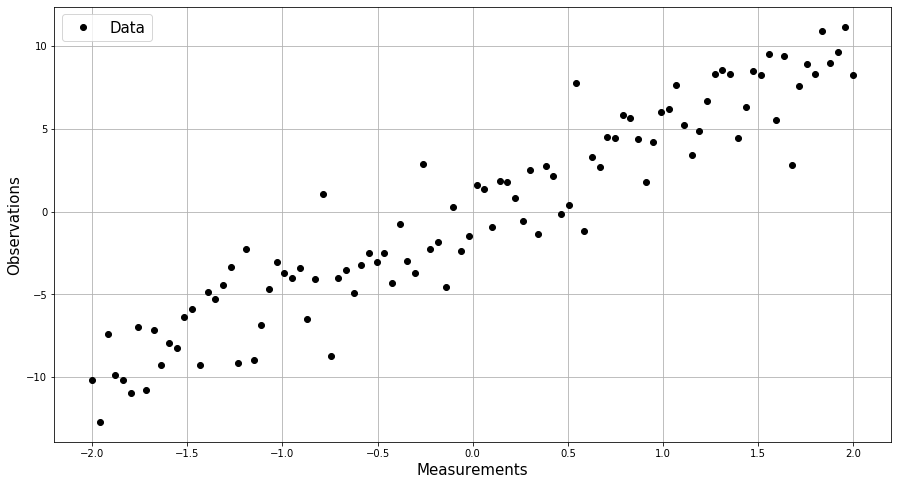

In [10]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'ko')
plt.xlabel("Measurements",fontsize=15)
plt.ylabel("Observations",fontsize=15)
plt.legend(["Data"],fontsize=15)
plt.grid()

In [12]:
def loss(w1,x,y):
    return ((y-(w1*x))**2).mean()

grad_loss=jit(grad(loss,argnums=(0)))

In [13]:
def optimize(w1,x,y,h=1.5):
    
    # Calcular Derivada
    w1_grad=grad_loss(w1,x,y)
    
    # Gradiente Descendiente
    w1-=h*w1_grad
    
    # Regresar Nuevos parámetros
    return w1

In [14]:
## Initial Guess
W1=10.

# Acumular resultados
w1=[]
train_loss=[]
# Número de veces que se cambiar los parámetros
epochs=401

# Tasa de Aprendizaje
h=0.01
#0.8

print("Pérdidas:\n")

w1.append(W1)
train_loss.append(loss(W1,x,y))
print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

for epoch in range(epochs):
    
    W1=optimize(W1,x,y,h)
    
    w1.append(W1)
    
    losss=loss(W1,x,y)
    
    train_loss.append(losss)
    
    if epoch%100==0:
        print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")

Pérdidas:

Condición Inicial: Pérdida: 38.407744806265676, Parámetro: 10.0



/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Iteración 0: Pérdida: 36.55500411987305, Parámetro: 9.86294937133789
Iteración 100: Pérdida: 4.018570423126221, Parámetro: 5.273087501525879
Iteración 200: Pérdida: 3.88777232170105, Parámetro: 4.982072830200195
Iteración 300: Pérdida: 3.887246608734131, Parámetro: 4.963622093200684
Iteración 400: Pérdida: 3.88724422454834, Parámetro: 4.962451457977295


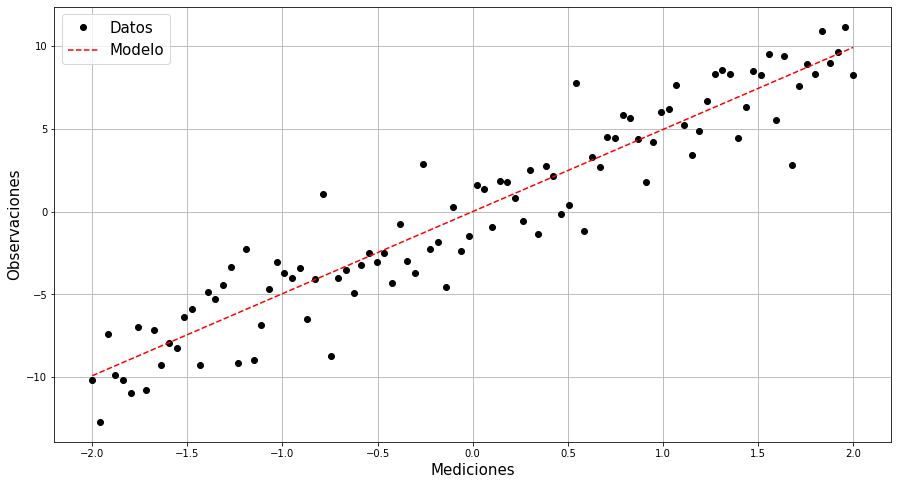

In [17]:
mod=w1[-1]*x
plt.figure(figsize=(15,8))
plt.plot(x,y,'ko')
plt.plot(x,mod,'r--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos","Modelo"],fontsize=15)
plt.grid()

In [18]:
# eje β (par.)
β1x=np.linspace(-2,11,epochs)

l=np.empty(len(β1x))

for i in range(len(l)):
    l[i]=((β1x[i]*x-y)**2).mean()

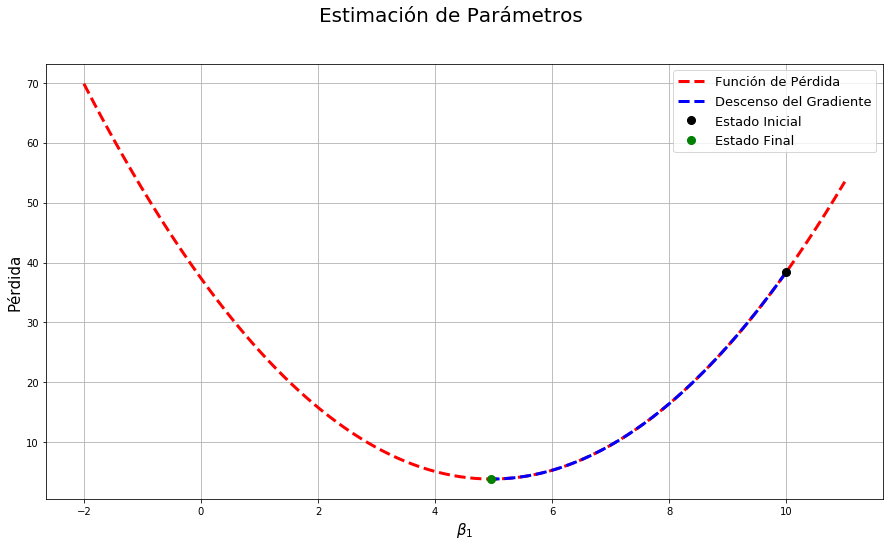

In [19]:
fig = plt.figure(figsize=(15,8))
plt.suptitle("Estimación de Parámetros",fontsize=20)
ax = plt.axes()


ax.plot(β1x,l,'r--',lw=3) # Loss Function

ax.plot(w1,train_loss,'b--',lw=3,ms=8) # Path Taken by Optimizer
ax.plot(w1[0],train_loss[0],'ko',ms=8) # Initial Condition
ax.plot(w1[-1],train_loss[-1],'go',ms=8) # Final State

ax.set_xlabel(r"$\beta_1$",fontsize=15)
ax.set_ylabel(r"Pérdida",fontsize=15)
plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
plt.grid()

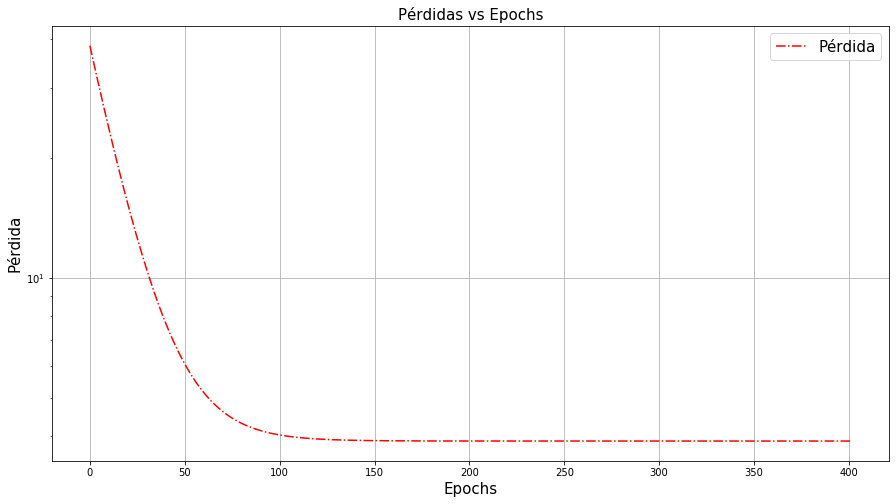

In [20]:
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs+1),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.title("Pérdidas vs Epochs",fontsize=15)
plt.grid()